In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data.csv')

In [3]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.000000,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.000000,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.000000,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.000000,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.000000,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.000000,2257.362667,2261.460000,368.13,380.13,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.000000,2876.641667,2883.970000,335.75,402.90,13.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.000000,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,...,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.000000,90.695000,90.695000,2287.50,2287.50,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.000000,29.357333,29.357333,612.96,612.96,11.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


In [4]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
df.shape

(209593, 37)

In [6]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [7]:
#Lets check the null value
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
Unnamed: 0              209593 non-null int64
label                   209593 non-null int64
msisdn                  209593 non-null object
aon                     209593 non-null float64
daily_decr30            209593 non-null float64
daily_decr90            209593 non-null float64
rental30                209593 non-null float64
rental90                209593 non-null float64
last_rech_date_ma       209593 non-null float64
last_rech_date_da       209593 non-null float64
last_rech_amt_ma        209593 non-null int64
cnt_ma_rech30           209593 non-null int64
fr_ma_rech30            209593 non-null float64
sumamnt_ma_rech30       209593 non-null float64
medianamnt_ma_rech30    209593 non-null float64
medianmarechprebal30    209593 non-null float64
cnt_ma_rech90           209593 non-null int64
fr_ma_rech90            209593 non-null int64
sumamnt_ma_rech90       209593 non-nul

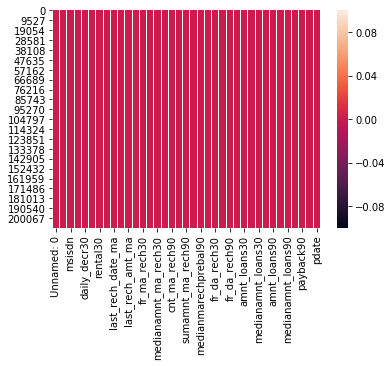

In [9]:
#Lets check the Heatmap;
sns.heatmap(df.isnull())

In [10]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [11]:
df['msisdn'].value_counts(normalize=True)

47819I90840    0.000033
04581I85330    0.000033
42825I88688    0.000029
43096I88688    0.000029
30080I90588    0.000029
55809I89238    0.000029
67324I84453    0.000029
87592I84456    0.000029
29191I82738    0.000029
60744I91197    0.000029
22038I88658    0.000029
43430I70786    0.000029
71742I90843    0.000029
94119I84456    0.000029
54218I70377    0.000024
43945I84452    0.000024
60650I85320    0.000024
61990I84451    0.000024
89501I89232    0.000024
51545I85329    0.000024
37897I89236    0.000024
30832I85330    0.000024
48516I70784    0.000024
07747I90581    0.000024
22713I91197    0.000024
82675I84450    0.000024
88892I70372    0.000024
12125I88650    0.000024
24906I70786    0.000024
62395I89230    0.000024
                 ...   
24717I70783    0.000005
44255I70377    0.000005
64057I82735    0.000005
13361I70376    0.000005
48203I82733    0.000005
25027I85328    0.000005
85087I82731    0.000005
84530I85338    0.000005
65858I70783    0.000005
16651I95203    0.000005
96950I85340    0

In [12]:
df['aon'].value_counts(normalize=True)

95.000000        0.001870
92.000000        0.001727
96.000000        0.001703
99.000000        0.001699
157.000000       0.001665
94.000000        0.001660
108.000000       0.001651
130.000000       0.001651
93.000000        0.001622
98.000000        0.001617
133.000000       0.001613
104.000000       0.001608
102.000000       0.001589
101.000000       0.001589
156.000000       0.001584
144.000000       0.001574
103.000000       0.001570
119.000000       0.001570
169.000000       0.001560
131.000000       0.001560
107.000000       0.001560
126.000000       0.001555
137.000000       0.001551
117.000000       0.001551
136.000000       0.001546
113.000000       0.001541
159.000000       0.001541
146.000000       0.001541
97.000000        0.001536
145.000000       0.001536
                   ...   
536644.381005    0.000005
814968.218678    0.000005
962524.019647    0.000005
677918.479661    0.000005
642969.113309    0.000005
803380.621830    0.000005
822624.712135    0.000005
695575.23995

In [13]:
#Lets create a dataframe with only numeric value
df_num = df[[ 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate']].copy()

In [14]:
#Lets use correlation
df_cor=df.corr()
df_cor

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,...,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260


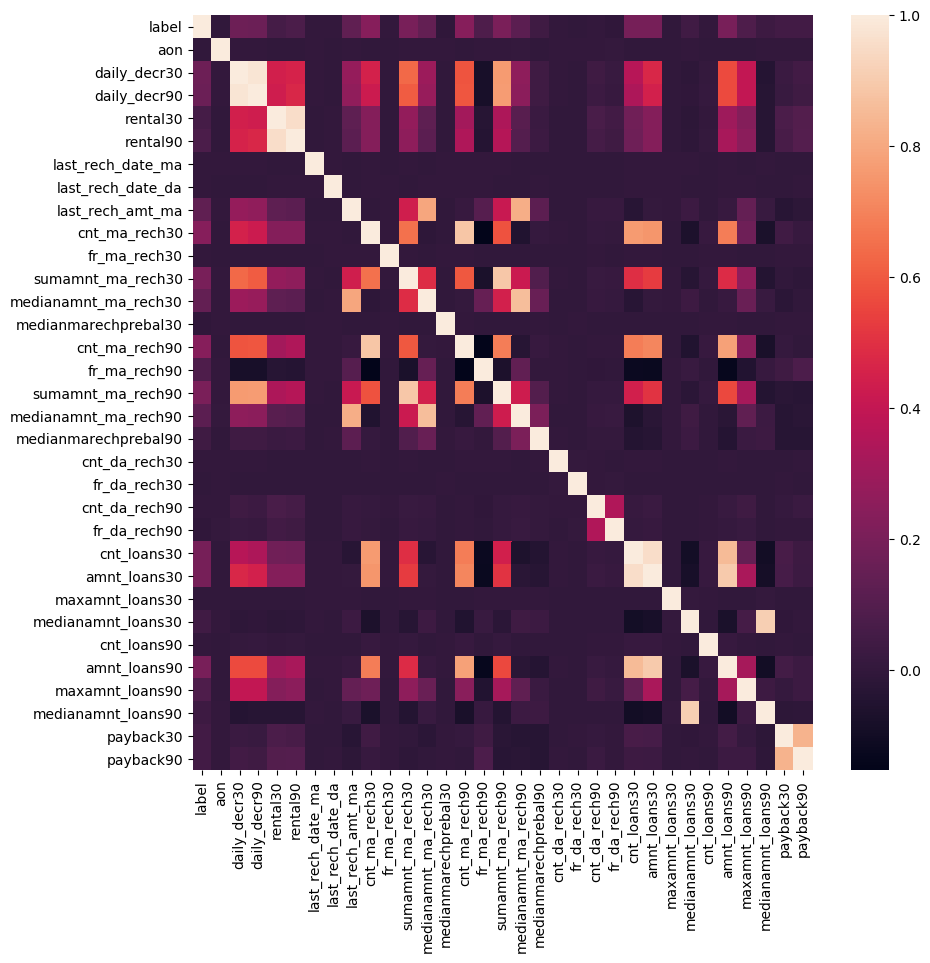

In [15]:
#lets use heatmap with corrlation
plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(df_num.corr())

In [16]:
#Lets remove the highly correlated value
df_uc = df_num[['medianmarechprebal90','pcircle','last_rech_date_da','medianamnt_loans30','medianamnt_loans90',
               'rental30','rental90','cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech90','cnt_da_rech30']].copy()
df_uc.head()

,medianmarechprebal90,pcircle,last_rech_date_da,medianamnt_loans30,medianamnt_loans90,rental30,rental90,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech90,cnt_da_rech30
0,7.50,UPW,0.0,0.0,0.0,220.13,260.13,2,21.0,3078,0.0
1,61.04,UPW,0.0,0.0,0.0,3691.26,3691.26,1,0.0,5787,0.0
2,66.32,UPW,0.0,0.0,0.0,900.13,900.13,1,0.0,1539,0.0
3,2.50,UPW,0.0,0.0,0.0,159.42,159.42,0,0.0,947,0.0
4,35.00,UPW,0.0,0.0,0.0,1098.90,1098.90,7,2.0,23496,0.0


In [17]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [18]:
df['maxamnt_loans30'].value_counts(normalize=True)

6.000000        0.854957
12.000000       0.124570
0.000000        0.015478
59275.166722    0.000005
68599.755670    0.000005
75033.890011    0.000005
90919.615488    0.000005
90459.114378    0.000005
17347.612209    0.000005
67755.334872    0.000005
94938.650685    0.000005
43221.389235    0.000005
78950.334359    0.000005
22061.221605    0.000005
59977.944139    0.000005
76032.753319    0.000005
81381.021186    0.000005
38687.617800    0.000005
54212.692196    0.000005
55999.432557    0.000005
82665.561645    0.000005
38676.756331    0.000005
95886.624904    0.000005
97745.693860    0.000005
13592.120874    0.000005
30287.097017    0.000005
75447.922695    0.000005
20817.527476    0.000005
92871.393228    0.000005
18579.692582    0.000005
                  ...   
97353.896433    0.000005
84933.921897    0.000005
5695.583419     0.000005
34076.305757    0.000005
57247.449473    0.000005
35905.058003    0.000005
36371.292998    0.000005
42662.443531    0.000005
94122.633158    0.000005


In [19]:
df['daily_decr30'].value_counts(normalize=True)

0.000000        0.019772
500.000000      0.003955
1000.000000     0.002715
700.000000      0.001818
600.000000      0.001689
800.000000      0.001455
1500.000000     0.001188
900.000000      0.000945
1200.000000     0.000907
1300.000000     0.000854
2500.000000     0.000797
2300.000000     0.000797
2000.000000     0.000797
1700.000000     0.000754
1400.000000     0.000730
1600.000000     0.000678
2100.000000     0.000673
2400.000000     0.000558
1800.000000     0.000549
1100.000000     0.000515
2600.000000     0.000506
3300.000000     0.000501
3000.000000     0.000458
8.000000        0.000458
2200.000000     0.000453
950.000000      0.000439
2800.000000     0.000429
3200.000000     0.000420
4.000000        0.000377
3500.000000     0.000367
                  ...   
322.091667      0.000005
14.343333       0.000005
13108.878000    0.000005
2414.408000     0.000005
16.877000       0.000005
24.998000       0.000005
91.240000       0.000005
213.720333      0.000005
59645.000000    0.000005


In [20]:
df['daily_decr90'].value_counts(normalize=True)

0.000000        0.019385
500.000000      0.003726
1000.000000     0.002338
700.000000      0.001637
600.000000      0.001508
800.000000      0.001288
1500.000000     0.000945
900.000000      0.000821
1200.000000     0.000740
1300.000000     0.000668
8.000000        0.000596
2300.000000     0.000577
1700.000000     0.000568
2000.000000     0.000549
1400.000000     0.000544
2500.000000     0.000534
1600.000000     0.000515
7.000000        0.000448
2100.000000     0.000439
4.000000        0.000406
1100.000000     0.000396
950.000000      0.000386
1800.000000     0.000358
5.600000        0.000344
12.000000       0.000344
2200.000000     0.000339
6.000000        0.000334
15.000000       0.000329
2400.000000     0.000324
2.000000        0.000324
                  ...   
10129.810000    0.000005
22478.390000    0.000005
3313.060000     0.000005
13922.460000    0.000005
15700.490000    0.000005
4865.510000     0.000005
4260.550000     0.000005
55.946000       0.000005
5411.660000     0.000005


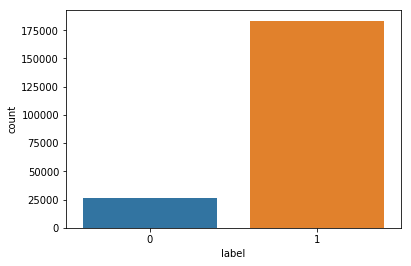

In [21]:
#Visualize the data with countplot
sns.countplot(df['label'])

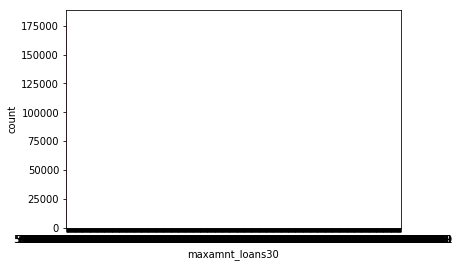

In [22]:
sns.countplot(df['maxamnt_loans30'])

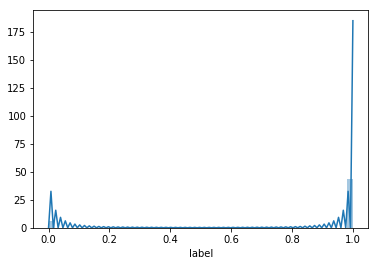

In [23]:
sns.distplot(df['label'])

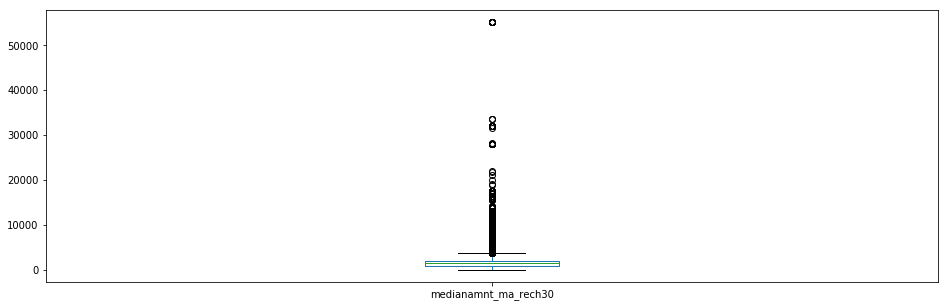

In [24]:
df['medianamnt_ma_rech30'].plot.box(figsize=(16,5))

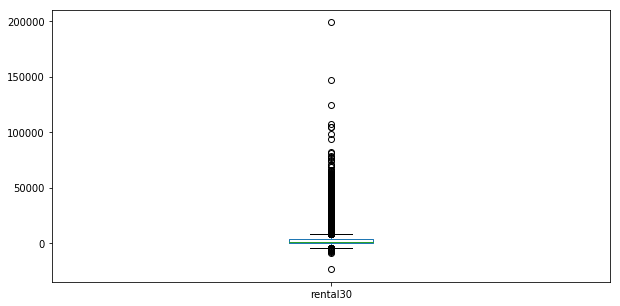

In [25]:
df['rental30'].plot.box(figsize=(10,5))

In [26]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


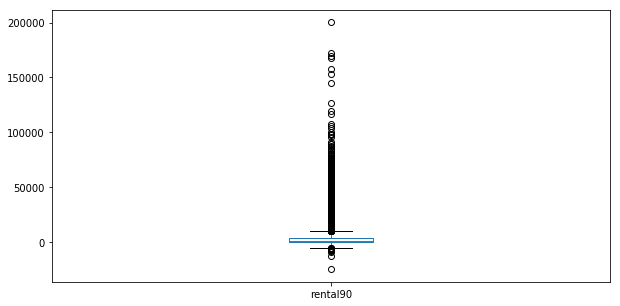

In [27]:
df['rental90'].plot.box(figsize=(10,5))

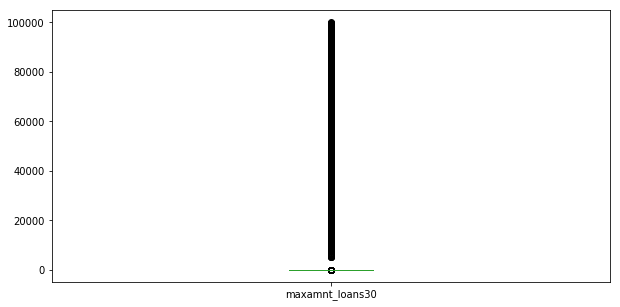

In [28]:
df['maxamnt_loans30'].plot.box(figsize=(10,5))

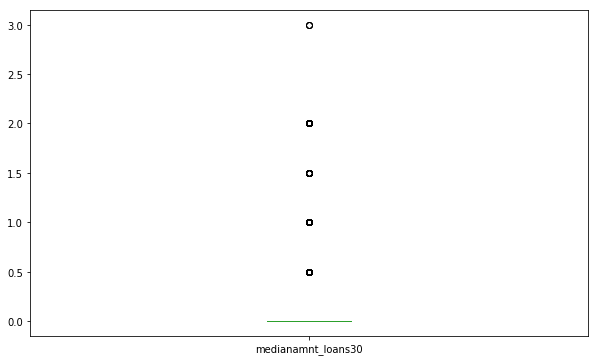

In [29]:
df['medianamnt_loans30'].plot.box(figsize=(10,6))

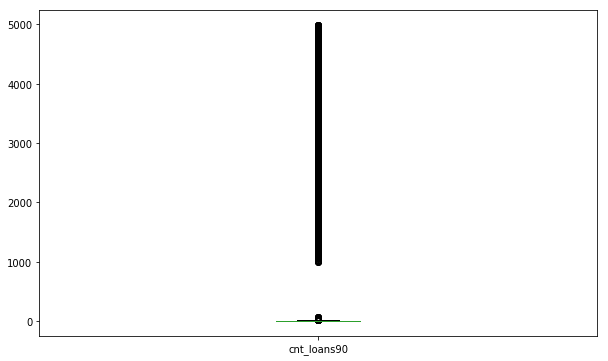

In [30]:
df['cnt_loans90'].plot.box(figsize=(10,6))

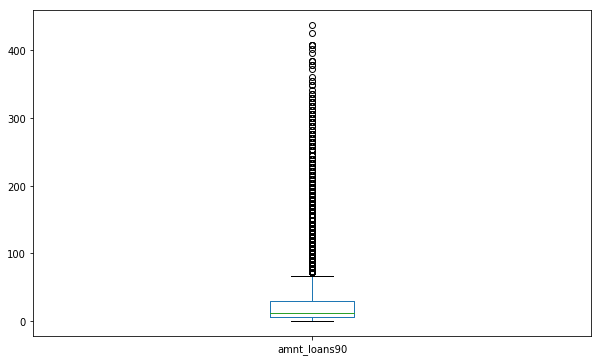

In [31]:
df['amnt_loans90'].plot.box(figsize=(10,6))

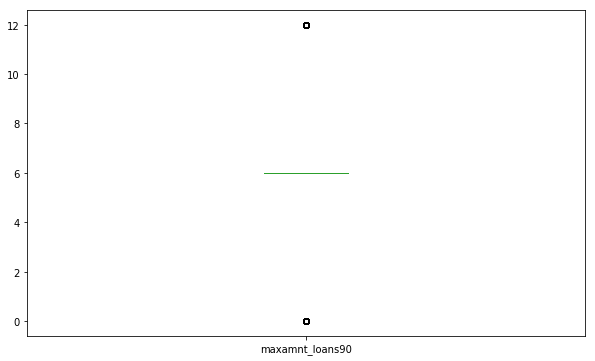

In [32]:
df['maxamnt_loans90'].plot.box(figsize=(10,6))

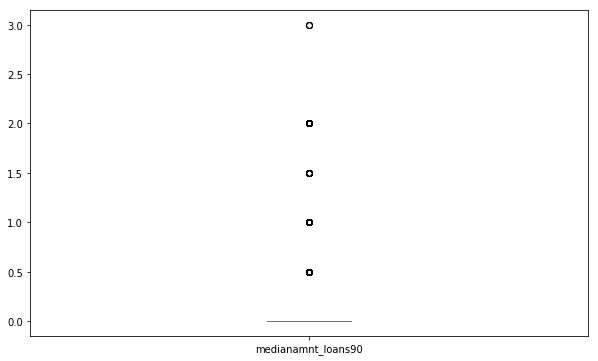

In [33]:
df['medianamnt_loans90'].plot.box(figsize=(10,6))

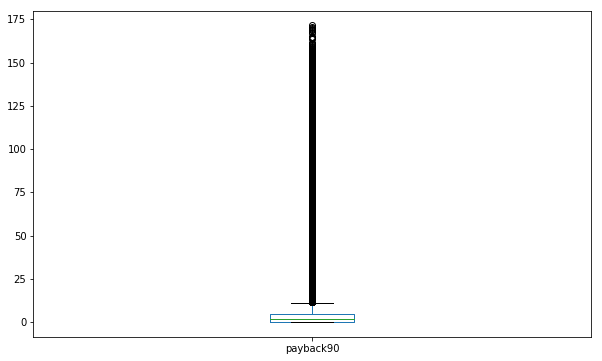

In [34]:
df['payback90'].plot.box(figsize=(10,6))

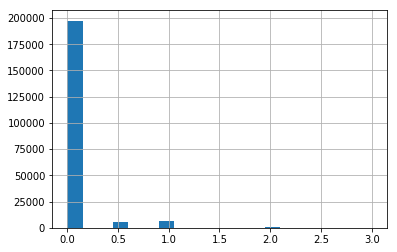

In [35]:
df['payback90'] = (df['medianamnt_loans90']) 
df['payback90'].hist(bins=20)

In [36]:
#Assigning levels to the categories
lis = []
for i in range(0, df.shape[1]):
    if(df.iloc[:,i].dtypes == 'object'):
        df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
        df.iloc[:,i] = df.iloc[:,i].cat.codes 
        df.iloc[:,i] = df.iloc[:,i].astype('object')
        lis.append(df.columns[i])

In [37]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,0.0,0,49
1,2,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.0,0,70
2,3,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.0,0,79
3,4,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.0,0,5
4,5,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,0.0,0,21


In [38]:
#split the data
X=df.iloc[: ,1:df.shape[1]].values
Y=df.iloc[:, 0].values

In [39]:
#lets split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.25,random_state=1)

In [40]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.005)
X = selector.fit_transform(X)
X.shape,Y.shape

((209593, 35), (209593,))

In [42]:
df.drop('pcircle',axis=1,inplace=True)

In [43]:
df.drop('pdate',axis=1,inplace=True)

In [44]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,0.0
1,2,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.0
2,3,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.0
3,4,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.0
4,5,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,0.0


In [45]:
df.shape

(209593, 35)

In [46]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [47]:
df.keys

<bound method NDFrame.keys of         Unnamed: 0  label  msisdn            aon  daily_decr30  daily_decr90  \
0                1      0   40191     272.000000   3055.050000   3065.150000   
1                2      1  142291     712.000000  12122.000000  12124.750000   
2                3      1   33594     535.000000   1398.000000   1398.000000   
3                4      1  104157     241.000000     21.228000     21.228000   
4                5      1    6910     947.000000    150.619333    150.619333   
5                6      1   67908     568.000000   2257.362667   2261.460000   
6                7      1  180459     545.000000   2876.641667   2883.970000   
7                8      1   18377     768.000000  12905.000000  17804.150000   
8                9      1  111511    1191.000000     90.695000     90.695000   
9               10      1  105147     536.000000     29.357333     29.357333   
10              11      1   62350    1511.000000     12.896000     12.896000   
11        

In [48]:
df.skew()

Unnamed: 0              2.854282e-15
label                  -2.270254e+00
msisdn                  7.189009e-04
aon                     1.039295e+01
daily_decr30            3.946230e+00
daily_decr90            4.252565e+00
rental30                4.521929e+00
rental90                4.437681e+00
last_rech_date_ma       1.479097e+01
last_rech_date_da       1.481486e+01
last_rech_amt_ma        3.781149e+00
cnt_ma_rech30           3.283842e+00
fr_ma_rech30            1.477283e+01
sumamnt_ma_rech30       6.386787e+00
medianamnt_ma_rech30    3.512324e+00
medianmarechprebal30    1.477988e+01
cnt_ma_rech90           3.425254e+00
fr_ma_rech90            2.285423e+00
sumamnt_ma_rech90       4.897950e+00
medianamnt_ma_rech90    3.752706e+00
medianmarechprebal90    4.488050e+01
cnt_da_rech30           1.781836e+01
fr_da_rech30            1.477643e+01
cnt_da_rech90           2.726728e+01
fr_da_rech90            2.898808e+01
cnt_loans30             2.713421e+00
amnt_loans30            2.975719e+00
m

In [49]:
X_train.shape

(157194, 36)

In [50]:
Y_train.shape

(157194,)

In [51]:
X_test.shape

(52399, 36)

In [52]:
Y_test.shape

(52399,)

# Decision Tree

In [55]:
#Lets use Decision TREE classifier
from sklearn.tree import DecisionTreeRegressor

dtrr=DecisionTreeRegressor()
dtrr.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [56]:
predict=dtrr.predict(X_test)
accuracy_dtrr=accuracy_score(Y_test,predict)*1

In [57]:
accuracy_dtrr

0.0

In [59]:
from sklearn.metrics import accuracy_score

y_predicted = dtrr.predict(X_test.astype(int))
accuracy_score(Y_test.astype(int), y_predicted)

0.0

# KNN

In [60]:
#Lets use KNN classifier
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=5)
Knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [61]:
predict_Knn=Knn.predict(X_test)
accuracy_Knn=accuracy_score(Y_test,predict)*1

In [62]:
accuracy_Knn

0.0

In [63]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [64]:
reg_rf.score(X_test, Y_test)

-0.11692534509522634

In [65]:
y_pred = reg_rf.predict(X_test)

In [66]:
reg_rf.score(X_train, Y_train)

0.801613763958555

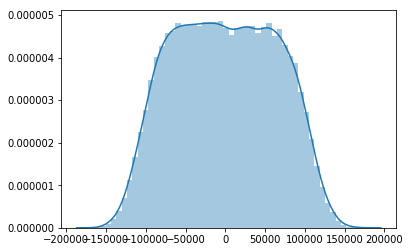

In [67]:
sns.distplot(Y_test-y_pred)
plt.show()

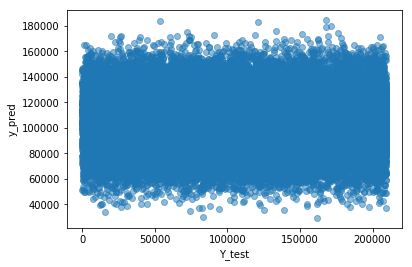

In [69]:
plt.scatter(Y_test, y_pred, alpha = 0.5)
plt.xlabel("Y_test")
plt.ylabel("y_pred")
plt.show()

In [70]:
from sklearn import metrics


print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MAE: 54628.43821192517
MSE: 4107125511.2261977
RMSE: 64086.85911500265
